In [25]:
##########_____Graph_Coloring_Data_Analysis_____##########

In [38]:
import networkx as nx
import matplotlib as plt
import numpy as np
import random
import itertools 
from collections import defaultdict, deque

Psuedocode for RLF:

result contains the list of nodes in order of how they should be colored

1. The First Node added is the one with the highest degree of neighbors.

2. subsequent nodes addded are as follows. 

    a) not adjacent to any vertices in result
    
    b) have a maximal number of neighbors that are adjacent to vertices in result.
        
        i) Ties should be decided by choosing the vertex with the minimum number of neighbors not in S

In [64]:
def RLFColoring(graph,colors = {}):
    
    #The list that we will return with order of nodes to be colored
    result = []
    count = 0
    
    
    #1) The First Node added is the one with the highest number of neighbors
    high = -1
    topNode = None
    for node in graph.__iter__():
        count+=1
        if graph.degree(node) > high:
            topNode = node
            high = graph.degree(node)
    result.append(topNode)   
    
    
        
    #2)Following nodes added 
    while len(result) < graph.number_of_nodes(): 
        
        #a) not currently adjacent to any vertex in result

            #dict of vertices adjacent to vertices in S
        adjdict = {}
        for node in result:
            count += 1
            adjdict.update(graph.adj[node])
        #list of vertices not adjacent to any vertex in Result
        notadj = []
        for node in graph.__iter__():
            count+=1
            if (adjdict.get(node) is None) and (node not in result):
                notadj.append(node)        
        #if not adj has none then we need to do something 
        if notadj == []:
            for node in graph.__iter__():
                count+=1
                if node not in result:
                    notadj.append(node)

                    
                    
                    
        #b) have maximal number of neighbors that are adjacent to vertices in result
        adjcount = -1
        #after iterating through all the comparisons, chosenNode will be the one we add to result
        chosenNode = None
        
        #iterate through all of the nodes that haven't been colored
        for node in notadj:
            count += 1
            new_count = 0
            
            #check how many of this nodes neighbors are adjacent to vertices in result
            for neigh in graph.neighbors(node):
                count += 1
                for secneigh in graph.neighbors(neigh):
                    count += 1
                    if secneigh in result:
                        new_count += 1
                        break
            if new_count > adjcount:
                chosenNode = node
                adjcount = new_count
             
            
            # i) ties are deciding by choosing the vertex with the minimal number of neighbors not in result
            if new_count == adjcount:
                if graph.degree(node) < graph.degree(chosenNode):
                    chosenNode = node
            
    

        result.append(chosenNode)
        
    return result, count

In [65]:
#strategy for randomly ordering the nodes for greedy coloring
def strategy_random_sequential(G, colors):
    count = 0
    nodes = list(G)
    #print(nodes)
    nodes = random.sample(nodes,len(nodes))
    #print(nodes)
    return nodes, count

In [66]:
def greedy_color(G, strategy):
    count = 0
    if len(G) == 0:
        return {}
    if not callable(strategy):
        raise nx.NetworkXError(
            "strategy must be callable or a valid string. " f"{strategy} not valid."
        )
    colors = {}
    nodes,count = strategy(G, colors)
    for u in nodes:
        # Set to keep track of colors of neighbours
        neighbour_colors = {colors[v] for v in G[u] if v in colors}
       # for v in G[u]:
       #     print(v)
        for i in neighbour_colors:
            count+=1
        # Find the first unused color.
        for color in itertools.count():
            if color not in neighbour_colors:
                break
        # Assign the new color to the current node.
        colors[u] = color
    return colors, count

In [67]:
#helper function of DSatur
def get_neighbor_colors(graph, node, color_map):
    neighbors = graph.neighbors(node)
    neighbor_colors = []
    count = 0
    for neigh in neighbors:
        
        if neigh in color_map:
            count+=1
            neighbor_colors.append(color_map[neigh])
    return list(set(neighbor_colors)), count

In [68]:
def DSatur(graph):
    #need a way to keep track of colors 
    color_dict = {}
    count = 0
    
    #need a while loop
    while len(color_dict) < len(graph.nodes()):
    
    #calc sat degrees
        count += [get_neighbor_colors(graph, node, color_dict)[1] for node in graph.nodes()][-1]
        all_color_list = { node: get_neighbor_colors(graph, node, color_dict)[0] for node in graph.nodes()}
        #print(all_color_list)
        #print(count)
        #sort uncolored nodes by sat degrees
        candidates = []
        for node in graph.nodes():
            if node not in color_dict:
                candidates.append(node)
        count+=(len(candidates))
        sorted_deg_map = sorted(candidates, key = lambda x: len(all_color_list[x]))
            
        #get node with highest sat degree
        node_toColor = sorted_deg_map[-1]
        #find the minimum allowed color a color the node that color 
        color = 0
        while color in all_color_list[node_toColor]:
            color += 1
            count+=1
        color_dict[node_toColor] = color
    #return the color map
    return color_dict, count

In [69]:
def average(lst):
    new_lst = []
    av = sum(lst)/len(lst)
    for i in range(len(lst)):
        new_lst.append(av)
    return av, new_lst

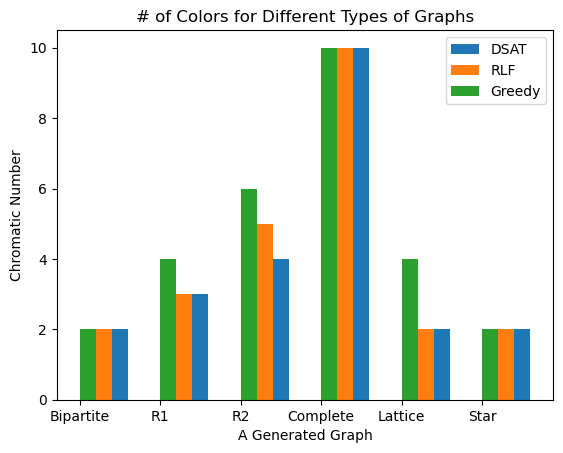

In [70]:
import matplotlib.pyplot as plt


B = (nx.algorithms.bipartite.gnmk_random_graph(10, 10, 90),"Bipartite")

C = (nx.complete_graph(10),"Complete")

S = (nx.star_graph(100, create_using=None),"Star")
R1 = (nx.gnm_random_graph(100,100),"R1")
R2 = (nx.gnm_random_graph(100,300), "R2")
L = (nx.grid_2d_graph(30,30),"Lattice")

graphs = [B[0], R1[0], R2[0], C[0], L[0], S[0]]
names = [B[1], R1[1], R2[1], C[1], L[1], S[1]]

x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('Chromatic Number')
plt.xlabel('A Generated Graph')
plt.title('# of Colors for Different Types of Graphs')

i = 0
for bot in graphs:
    gr = greedy_color(bot, strategy_random_sequential)[0]
    RLF = greedy_color(bot, RLFColoring)[0]
    DSat = DSatur(bot)[0]
    
    
    x_values.append (names[i])
    y_values_DSatur.append(
        max(list(DSat.values())) +1
    )
    y_values_RLF.append(
        max(list(RLF.values())) +1
    )
    y_values_Greedy_rand.append(
        max(list(gr.values())) +1
    )
    i+=1
    
    

plt.bar(x_values, y_values_DSatur, width=0.6, bottom=None, align ='edge', label="DSAT")
plt.bar(x_values, y_values_RLF, width=0.4, bottom=None, align ='edge', label="RLF")
plt.bar(x_values, y_values_Greedy_rand, width=0.2, bottom=None, align='edge', label="Greedy")

'''
plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")
'''
leg = plt.legend(loc='best')

plt.show()

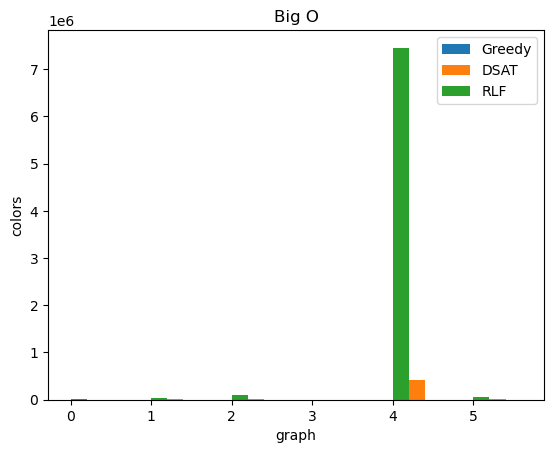

In [71]:
import matplotlib.pyplot as plt


graphs = []
B = nx.algorithms.bipartite.gnmk_random_graph(10, 10, 90)

C = nx.complete_graph(10)

S = nx.star_graph(100, create_using=None)
R1 = (nx.gnm_random_graph(100,100))
R2 = nx.gnm_random_graph(100,300)
L = nx.grid_2d_graph(30,30)

graphs += [B, R1, R2, C, L, S,]

x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O')

i = 0
for bot in graphs:
    y_values_Greedy_rand.append(greedy_color(bot, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(bot, RLFColoring)[1])
    y_values_DSatur.append(DSatur(bot)[1])
    
    x_values.append (i)
    
    i+=1

    
plt.bar(x_values, y_values_Greedy_rand, width=0.6, bottom=None, align='edge', label="Greedy")
plt.bar(x_values, y_values_DSatur, width=0.4, bottom=None, align ='edge', label="DSAT")
plt.bar(x_values, y_values_RLF, width=0.2, bottom=None, align ='edge', label="RLF")
'''
plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")
'''
leg = plt.legend(loc='best')

plt.show()

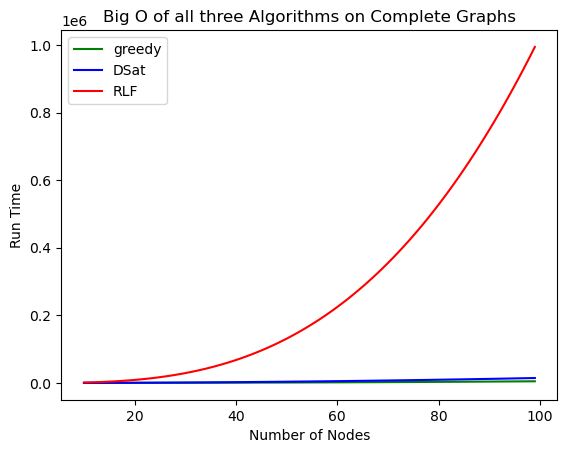

In [72]:
import matplotlib.pyplot as plt



x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('Run Time')
plt.xlabel('Number of Nodes')
plt.title('Big O of all three Algorithms on Complete Graphs')


for i in range(10,100):
    
    G = nx.complete_graph(i)
    y_values_Greedy_rand.append(greedy_color(G, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(G, RLFColoring)[1])
    y_values_DSatur.append(DSatur(G)[1])
    
    x_values.append (i)
    

plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

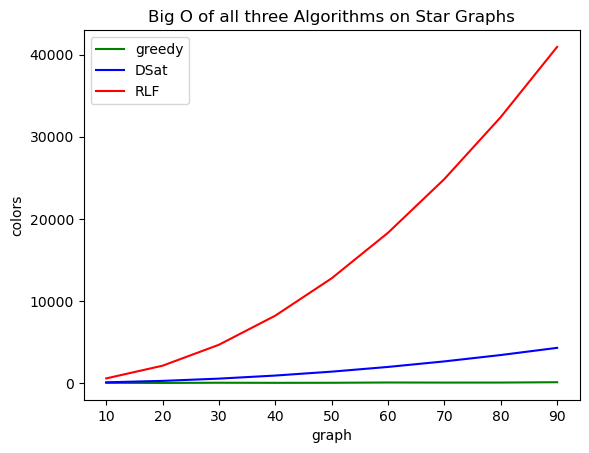

In [73]:
#Big O of Our Algorithms Complete Graphs
import matplotlib.pyplot as plt



x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O of all three Algorithms on Star Graphs')


for i in range(10, 100, 10):
    
    G = nx.star_graph(i)
    
    y_values_Greedy_rand.append(greedy_color(G, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(G, RLFColoring)[1])
    y_values_DSatur.append(DSatur(G)[1])
    
    x_values.append (i)
    

plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

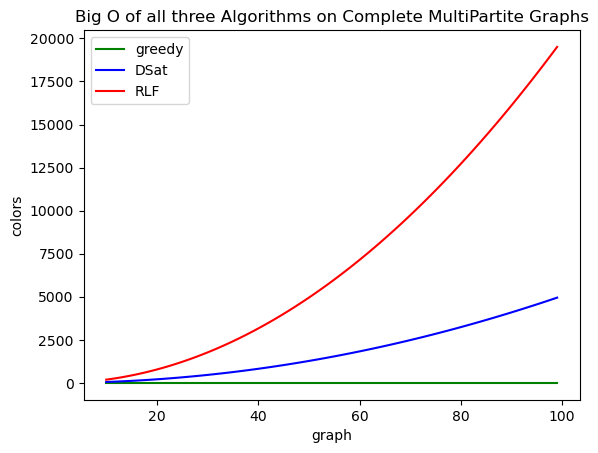

In [74]:
#Big O of Our Algorithms Complete Graphs
import matplotlib.pyplot as plt




x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O of all three Algorithms on Complete MultiPartite Graphs')


for i in range(10,100):
    
    G = nx.complete_multipartite_graph(i)
    
    y_values_Greedy_rand.append(greedy_color(G, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(G, RLFColoring)[1])
    y_values_DSatur.append(DSatur(G)[1])
    
    x_values.append (i)
    

plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

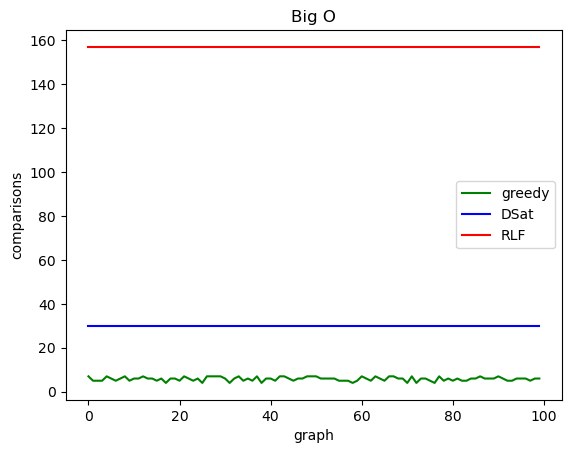

In [75]:
bot = nx.Graph()

bot.add_edge('a', 'f')
bot.add_edge('a', 'c')
bot.add_edge('a', 'd')
bot.add_edge('a', 'e')
bot.add_edge('f', 'b')
bot.add_edge('e', 'd')
bot.add_edge('c', 'd')


import matplotlib.pyplot as plt



x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('comparisons')
plt.xlabel('graph')
plt.title('Big O')


for i in range(100):
    
    y_values_Greedy_rand.append(greedy_color(bot, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(bot, RLFColoring)[1])
    y_values_DSatur.append(DSatur(bot)[1])
    
    x_values.append (i)
    

plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

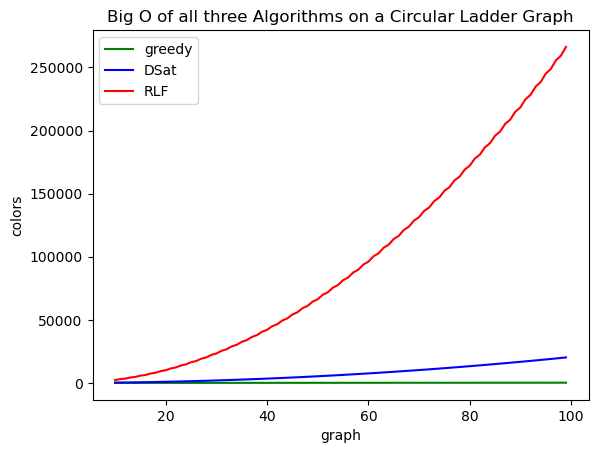

In [76]:
#Big O of Our Algorithms Complete Graphs
import matplotlib.pyplot as plt



x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O of all three Algorithms on a Circular Ladder Graph')


for i in range(10,100):
    
    G = nx.circular_ladder_graph(i)
    
    y_values_Greedy_rand.append(greedy_color(G, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(G, RLFColoring)[1])
    y_values_DSatur.append(DSatur(G)[1])
    
    x_values.append (i)
    

plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

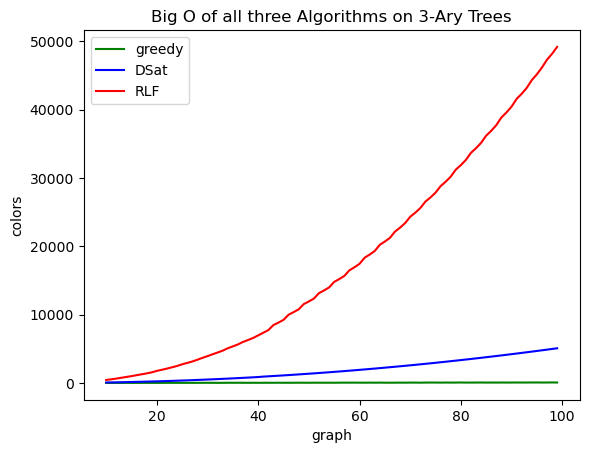

In [77]:
#Big O of Our Algorithms Complete Graphs
import matplotlib.pyplot as plt



x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O of all three Algorithms on 3-Ary Trees')


for i in range(10,100):
    
    G = nx.full_rary_tree(3,i)
    
    y_values_Greedy_rand.append(greedy_color(G, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(G, RLFColoring)[1])
    y_values_DSatur.append(DSatur(G)[1])
    
    x_values.append (i)
    

plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

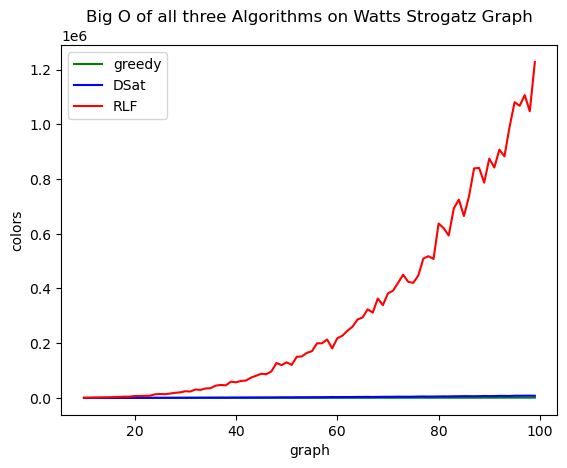

In [78]:


#Big O of Our Algorithms Complete Graphs
import matplotlib.pyplot as plt



x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O of all three Algorithms on Watts Strogatz Graph')


for i in range(10,100):
    
    G = nx.watts_strogatz_graph(i, i // 2, .5)
    
    y_values_Greedy_rand.append(greedy_color(G, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(G, RLFColoring)[1])
    y_values_DSatur.append(DSatur(G)[1])
    
    x_values.append (i)
    

plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

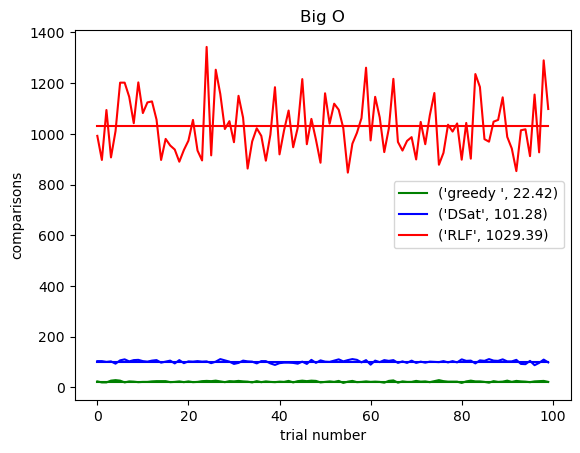

In [79]:
x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('comparisons')
plt.xlabel('trial number')
plt.title('Big O')


for i in range(100):
    
    bot = nx.gnm_random_graph(10, 30)
    
    y_values_Greedy_rand.append(greedy_color(bot, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(bot, RLFColoring)[1])
    y_values_DSatur.append(DSatur(bot)[1])
    
    x_values.append (i)
    

plt.plot(x_values, y_values_Greedy_rand, 'green', label = ("greedy ", average(y_values_Greedy_rand)[0]))
plt.plot(x_values, y_values_DSatur, 'blue', label = ("DSat", average(y_values_DSatur)[0]))
plt.plot(x_values, y_values_RLF, 'red', label = ("RLF", average(y_values_RLF)[0]))


plt.plot(x_values, average(y_values_Greedy_rand)[1], 'green')
plt.plot(x_values, average(y_values_DSatur)[1], 'blue')
plt.plot(x_values, average(y_values_RLF)[1], 'red')

leg = plt.legend(loc='best')

plt.show()

[6, 6, 6, 5, 6, 4, 5, 6, 5, 6, 5, 5, 5, 5, 6, 4, 5, 6, 4, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 4, 6, 6, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 4, 5, 5, 5, 5, 4, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5]


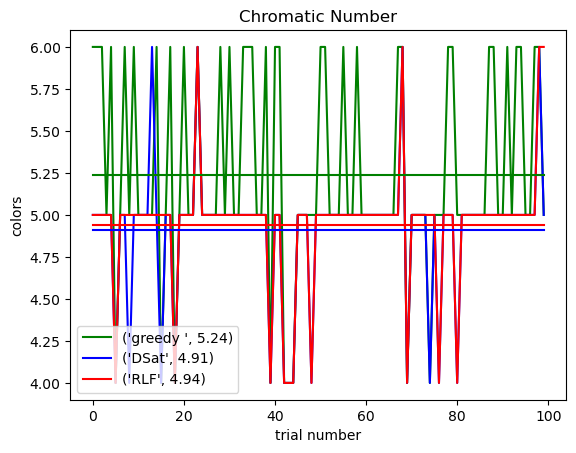

In [80]:
x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('trial number')
plt.title('Chromatic Number')


for i in range(100):
    bot = nx.gnm_random_graph(10, 30)
    
    gr = greedy_color(bot, strategy_random_sequential)[0]
    RLF = greedy_color(bot, RLFColoring)[0]
    DSat = DSatur(bot)[0]
    
    
    x_values.append (i)
    y_values_DSatur.append(
        max(list(DSat.values())) +1
    )
    y_values_RLF.append(
        max(list(RLF.values())) +1
    )
    y_values_Greedy_rand.append(
        max(list(gr.values())) +1
    )

    
print(y_values_Greedy_rand)
plt.plot(x_values, y_values_Greedy_rand, 'green', label = ("greedy ", average(y_values_Greedy_rand)[0]))
plt.plot(x_values, y_values_DSatur, 'blue', label = ("DSat", average(y_values_DSatur)[0]))
plt.plot(x_values, y_values_RLF, 'red', label = ("RLF", average(y_values_RLF)[0]))


plt.plot(x_values, average(y_values_Greedy_rand)[1], 'green')
plt.plot(x_values, average(y_values_DSatur)[1], 'blue')
plt.plot(x_values, average(y_values_RLF)[1], 'red')

leg = plt.legend(loc='best')

plt.show()

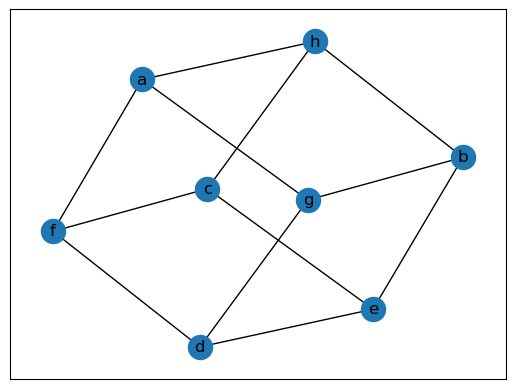

In [81]:
bot = nx.Graph()

bot.add_edge('a', 'f')
bot.add_edge('a', 'g')
bot.add_edge('a', 'h')
bot.add_edge('b', 'e')
bot.add_edge('b', 'g')
bot.add_edge('b', 'h')
bot.add_edge('c', 'e')
bot.add_edge('c', 'f')
bot.add_edge('c', 'h')
bot.add_edge('d', 'e')
bot.add_edge('d', 'f')
bot.add_edge('d', 'g')

nx.draw_networkx(bot)

['a', 'f', 'g', 'h', 'b', 'e', 'c', 'd']
[2, 2, 2, 3, 2, 4, 2, 2, 4, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 4, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2]


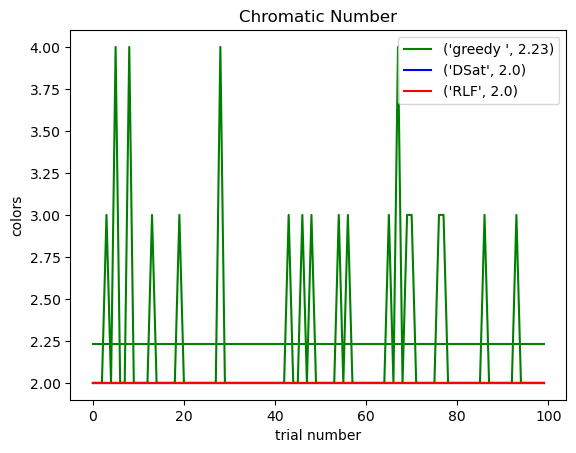

In [82]:
x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('trial number')
plt.title('Chromatic Number')

bot = nx.Graph()

bot.add_edge('a', 'f')
bot.add_edge('a', 'g')
bot.add_edge('a', 'h')
bot.add_edge('b', 'e')
bot.add_edge('b', 'g')
bot.add_edge('b', 'h')
bot.add_edge('c', 'e')
bot.add_edge('c', 'f')
bot.add_edge('c', 'h')
bot.add_edge('d', 'e')
bot.add_edge('d', 'f')
bot.add_edge('d', 'g')

print(bot.nodes())
for i in range(100):
    
    gr = greedy_color(bot, strategy_random_sequential)[0]
    RLF = greedy_color(bot, RLFColoring)[0]
    DSat = DSatur(bot)[0]
    
    
    x_values.append (i)
    y_values_DSatur.append(
        max(list(DSat.values())) +1
    )
    y_values_RLF.append(
        max(list(RLF.values())) +1
    )
    y_values_Greedy_rand.append(
        max(list(gr.values())) +1
    )

    
print(y_values_Greedy_rand)
plt.plot(x_values, y_values_Greedy_rand, 'green', label = ("greedy ", average(y_values_Greedy_rand)[0]))
plt.plot(x_values, y_values_DSatur, 'blue', label = ("DSat", average(y_values_DSatur)[0]))
plt.plot(x_values, y_values_RLF, 'red', label = ("RLF", average(y_values_RLF)[0]))


plt.plot(x_values, average(y_values_Greedy_rand)[1], 'green')
plt.plot(x_values, average(y_values_DSatur)[1], 'blue')
plt.plot(x_values, average(y_values_RLF)[1], 'red')

leg = plt.legend(loc='best')

plt.show()

In [83]:
nodes = ['a','b','c','d','e','f','g','h']
bot = nx.Graph()
bot.add_nodes_from(nodes)

bot.add_edge('a', 'f')
bot.add_edge('a', 'g')
bot.add_edge('a', 'h')
bot.add_edge('b', 'e')
bot.add_edge('b', 'g')
bot.add_edge('b', 'h')
bot.add_edge('c', 'e')
bot.add_edge('c', 'f')
bot.add_edge('c', 'h')
bot.add_edge('d', 'e')
bot.add_edge('d', 'f')
bot.add_edge('d', 'g')

{'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 1, 'f': 1, 'g': 1, 'h': 1}


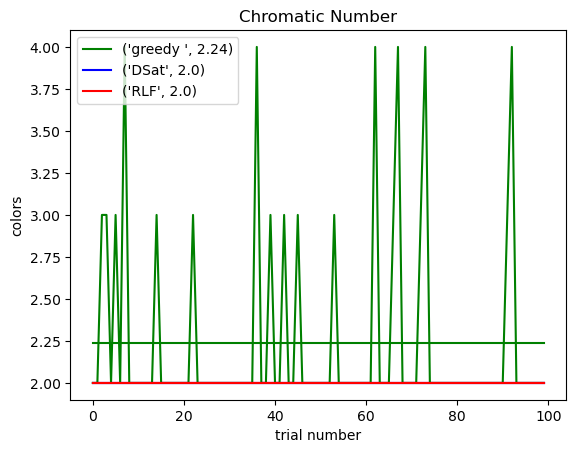

In [84]:
x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('trial number')
plt.title('Chromatic Number')

#nodes = ['a','e','b','f','c','g','d','h']
nodes = ['a','b','c','d','e','f','g','h']
#nodes = ['a','c','d','a','e','f','g','h']
#nodes = ['a','b','f','d','e','h','g','c']
bot = nx.Graph()
bot.add_nodes_from(nodes)

bot.add_edge('a', 'f')
bot.add_edge('a', 'g')
bot.add_edge('a', 'h')
bot.add_edge('b', 'e')
bot.add_edge('b', 'g')
bot.add_edge('b', 'h')
bot.add_edge('c', 'e')
bot.add_edge('c', 'f')
bot.add_edge('c', 'h')
bot.add_edge('d', 'e')
bot.add_edge('d', 'f')
bot.add_edge('d', 'g')

for i in range(100):
    
    gr = greedy_color(bot, strategy_random_sequential)[0]
    RLF = greedy_color(bot, RLFColoring)[0]
    DSat = DSatur(bot)[0]
    
    
    x_values.append (i)
    y_values_DSatur.append(
        max(list(DSat.values())) +1
    )
    y_values_RLF.append(
        max(list(RLF.values())) +1
    )
    y_values_Greedy_rand.append(
        max(list(gr.values())) +1
    )

    
print(RLF)
plt.plot(x_values, y_values_Greedy_rand, 'green', label = ("greedy ", average(y_values_Greedy_rand)[0]))
plt.plot(x_values, y_values_DSatur, 'blue', label = ("DSat", average(y_values_DSatur)[0]))
plt.plot(x_values, y_values_RLF, 'red', label = ("RLF", average(y_values_RLF)[0]))


plt.plot(x_values, average(y_values_Greedy_rand)[1], 'green')
plt.plot(x_values, average(y_values_DSatur)[1], 'blue')
plt.plot(x_values, average(y_values_RLF)[1], 'red')

leg = plt.legend(loc='best')

plt.show()